## Clustering Orange survey data with K-Means, DBSCAN and Louvain method

First we read the data and preprocess it for later use. We can remove few unrelavent atributes like: "Start Date (UTC)", "Submit Date (UTC)", "Network ID", "#", "Other", "Other.1", "Other.2", "Other.3". All atributes in data are optional, that means that there are only a few different values in each column. If we can look at columns "Excel", "IBM SPSS Statistics", "KNIME", "MATLAB", "Python", "Python Pandas", "R", "Rapid Miner","SQL", "Weka","None", we can see that this columns structure can be changed to binary form.   


In [3]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn import metrics
import sklearn.neighbors as sk
import numpy as np


In [4]:
data = pd.read_csv("Orange questionnaire.csv")

# drop all unrelavant atributes
data = data.drop("#", axis=1)
data = data.drop("Other", axis=1)
data = data.drop("Other.1", axis=1)
data = data.drop("Other.2", axis=1)
data = data.drop("Other.3", axis=1)
data = data.drop("Start Date (UTC)", axis=1)
data = data.drop("Submit Date (UTC)", axis=1)
data = data.drop("Network ID", axis=1)
original = data.copy(deep=False)
# change columns from index 3 to 14 to binary values 
for n in range(3, 15):
    data.iloc[:, n] = (~data.iloc[:, n].isnull()).astype(int)
    

FileNotFoundError: File b'Orange questionnaire.csv' does not exist

#### Data analysis and visualization

Here we represent each atribute, so we can see how many of each values are in it. Then we use t-SNE method for dimension reduction, so we can visualize multidimensional data in 2D space. We use t-SNE with different paramters, so we can se the difference.

In [44]:
for a in original:
    print(original[a].value_counts(),"\n")

Web           6941
Anaconda      4506
College       2612
School        1588
Friends       1196
Job           1189
Conference     489
Name: Where did you find out about Orange?, dtype: int64 

Beginner        13273
Intermediate     4711
Expert           1244
Name: What Data Mining level are you?, dtype: int64 

I'm a student    6007
Industry         5948
Academia         3779
Research         2587
Name: Where do you work?, dtype: int64 

Excel    12210
Name: Excel, dtype: int64 

IBM SPSS Statistics    2244
Name: IBM SPSS Statistics, dtype: int64 

KNIME    969
Name: KNIME, dtype: int64 

MATLAB    4062
Name: MATLAB, dtype: int64 

Python    9064
Name: Python, dtype: int64 

Python Pandas    4620
Name: Python Pandas, dtype: int64 

R    5911
Name: R, dtype: int64 

Rapid Miner    1312
Name: Rapid Miner, dtype: int64 

SQL    6988
Name: SQL, dtype: int64 

Weka    2104
Name: Weka, dtype: int64 

None    955
Name: None, dtype: int64 

                                                   11


In [46]:
# Replace NaN values with 0 and strings to numbers.
level = {"Expert": 3, "Beginner": 1, "Intermediate": 2, 0: 0, "NaN": 0}

job = {"Academia": 3, "Research": 1, "I'm a student": 2, 0: 0, "Industry": 4}

find_out = {"College": 1, "Conference": 2, "Web": 3, "Friends": 4, "School": 5, "Job": 6, "Anaconda": 7, 0: 0}


data["Where do you work?"] = data["Where do you work?"].fillna(0)
data["Where do you work?"] = data["Where do you work?"].replace(job)


data["What Data Mining level are you?"] = data["What Data Mining level are you?"].fillna(0)
data["What Data Mining level are you?"] = data["What Data Mining level are you?"].replace(level)

data["Where did you find out about Orange?"] = data["Where did you find out about Orange?"].fillna(0)
data["Where did you find out about Orange?"] = data["Where did you find out about Orange?"].replace(find_out)




In [183]:
print(data.shape)

(19681, 15)


In [104]:
data_2D = TSNE(n_components=2, perplexity=200).fit_transform(data)

Text(0.5,1,'T-SNE')

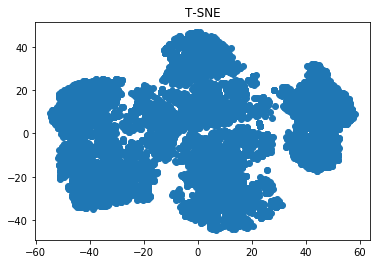

In [106]:
plt.scatter(data_2D[:, 0], data_2D[:, 1])
plt.title("T-SNE")

Here we try different perplexity number, so we can see how it effects structure of data.

In [49]:
data_2D_5 = TSNE(n_components=2, perplexity=5).fit_transform(data)

In [50]:
data_2D_30 = TSNE(n_components=2, perplexity=30).fit_transform(data)

In [51]:
data_2D_50 = TSNE(n_components=2, perplexity=50).fit_transform(data)

In [109]:
data_2D_100 = TSNE(n_components=2, perplexity=500).fit_transform(data)

Text(0.5,1,'T-SNE-5')

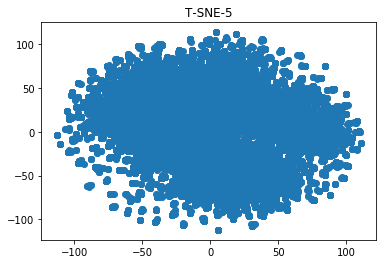

In [53]:
plt.scatter(data_2D_5[:, 0], data_2D_5[:, 1])
plt.title("T-SNE-5")

Text(0.5,1,'T-SNE-30')

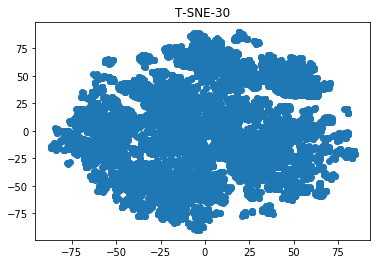

In [54]:
plt.scatter(data_2D_30[:, 0], data_2D_30[:, 1])
plt.title("T-SNE-30")

Text(0.5,1,'T-SNE-50')

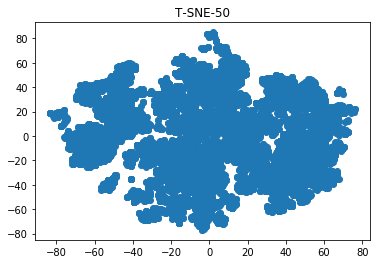

In [55]:
plt.scatter(data_2D_50[:, 0], data_2D_50[:, 1])
plt.title("T-SNE-50")

Text(0.5,1,'T-SNE-500')

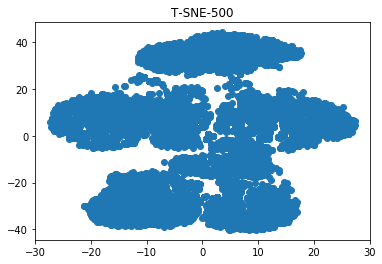

In [157]:
plt.scatter(data_2D_100[:, 0], data_2D_100[:, 1])
plt.title("T-SNE-500")


### Clustering the data with k-MEANS method

Here we preform clustering on data with k-MEANS method. 

In [61]:
test = data.sample(n=5000)

With elbow method, we try to figure out the optimal number of clusters, but later we check the quality of clustering with silhouette score.

Text(0,0.5,'WCSS')

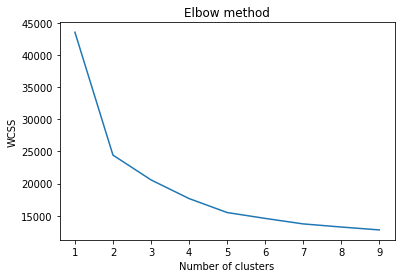

In [159]:
k_means_results = []
for n_clusters in range(1,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(test)
    k_means_results.append(clusterer.inertia_)
plt.plot(range(1,10),k_means_results)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [133]:
results = {}
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(test)
    silhouette_avg = silhouette_score(test, cluster_labels)
    print(davies_bouldin_score(test, cluster_labels)," -bouldin")
    print(silhouette_avg," -silhouette")
    results[n_clusters] = cluster_labels

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.05322972566  -bouldin
0.3744204523  -silhouette


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.46282599628  -bouldin
0.264971478383  -silhouette


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.3030805104  -bouldin
0.259722249499  -silhouette


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.47531451925  -bouldin
0.237921886796  -silhouette


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.44569274185  -bouldin
0.229412939886  -silhouette


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.51783519326  -bouldin
0.226729366336  -silhouette


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.68412343415  -bouldin
0.20624683177  -silhouette
1.81510652569  -bouldin
0.186910678305  -silhouette


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [87]:
data_2d_test = TSNE(n_components=2, perplexity=30).fit_transform(test)


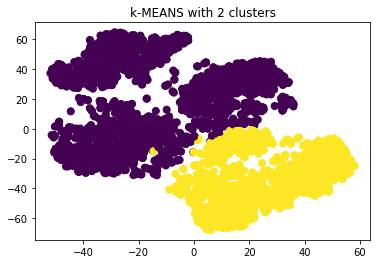

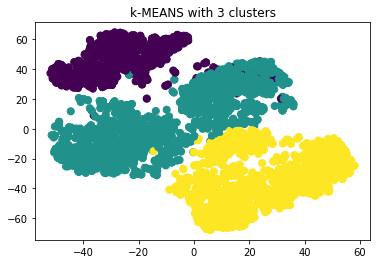

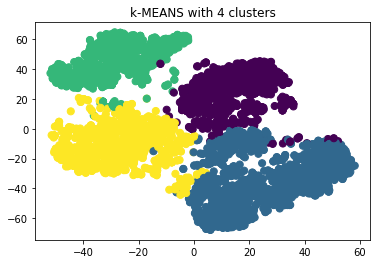

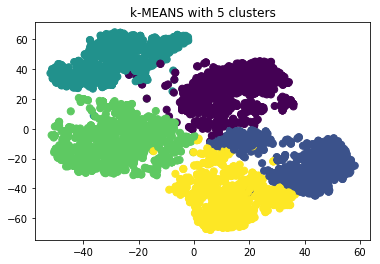

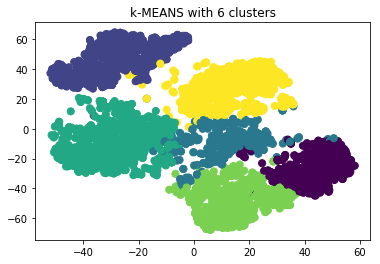

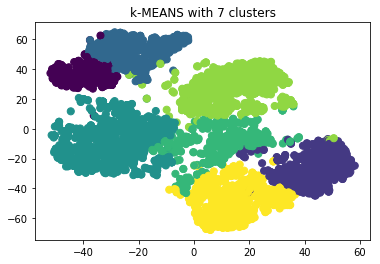

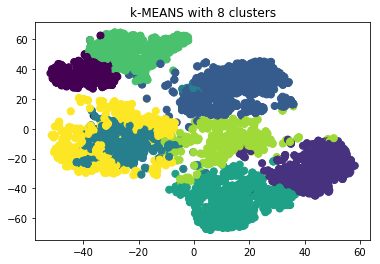

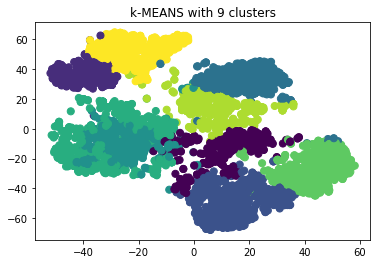

In [86]:
for clusters in results:
    plt.figure()
    plt.scatter(data_2d_test[:, 0], data_2d_test[:, 1], c=results[clusters], s=50, cmap='viridis')
    plt.title("k-MEANS with "+str(clusters)+" clusters")


### Clustering the data with DBSCAN method

Here we preform clustering on data with DBSCAN method. With elbow method, we try to figure out the optimal parameter eps. The results of clustering are rated with the silhouette score.

In [164]:
# this is the function that returns the distance to k-th neighbour
def k_dist(X, metric, k=3):
        data = []
        tree = sk.KDTree(X, leaf_size=30)
        for n,point in enumerate(X):
            dist, ind = tree.query([point], k=k)
            data.append(dist[0].tolist()[k-1])
        return data

Here we preform the elbow method, so we can try to find out the optimal parameter eps.

In [125]:
X_2 = TSNE(n_components=2 , perplexity=30).fit_transform(test)


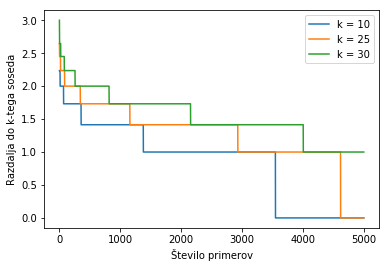

In [182]:
K_2 = k_dist(test.values, '', 5)
K_3 = k_dist(test.values, '', 20)
K_8 = k_dist(test.values, '', 50)
# print(sorted(K_2, reverse=True))
# print(sorted(K_3, reverse=True))
# print(sorted(K_8, reverse=True))
plt.plot(sorted(K_2, reverse=True))
plt.plot(sorted(K_3, reverse=True))
plt.plot(sorted(K_8, reverse=True))
plt.legend(["k = 10", "k = 25", "k = 30"])
plt.xlabel('Število primerov')
plt.ylabel('Razdalja do k-tega soseda')
plt.show()

In [180]:
# X_2 = TSNE(n_components=2 , perplexity=30).fit_transform(test)

db = DBSCAN(eps=4, min_samples=4).fit(X_2)
labels = db.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(test, labels))


Estimated number of clusters: 16
Estimated number of noise points: 12
Silhouette Coefficient: -0.214


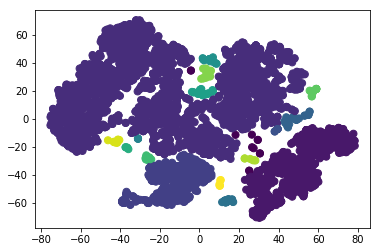

In [181]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=labels, s=50, cmap='viridis')

In [134]:
print(results[2])

[0 1 0 ..., 0 1 0]
